In [97]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [98]:
df = pd.read_csv("fmnist_small.csv")

In [99]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


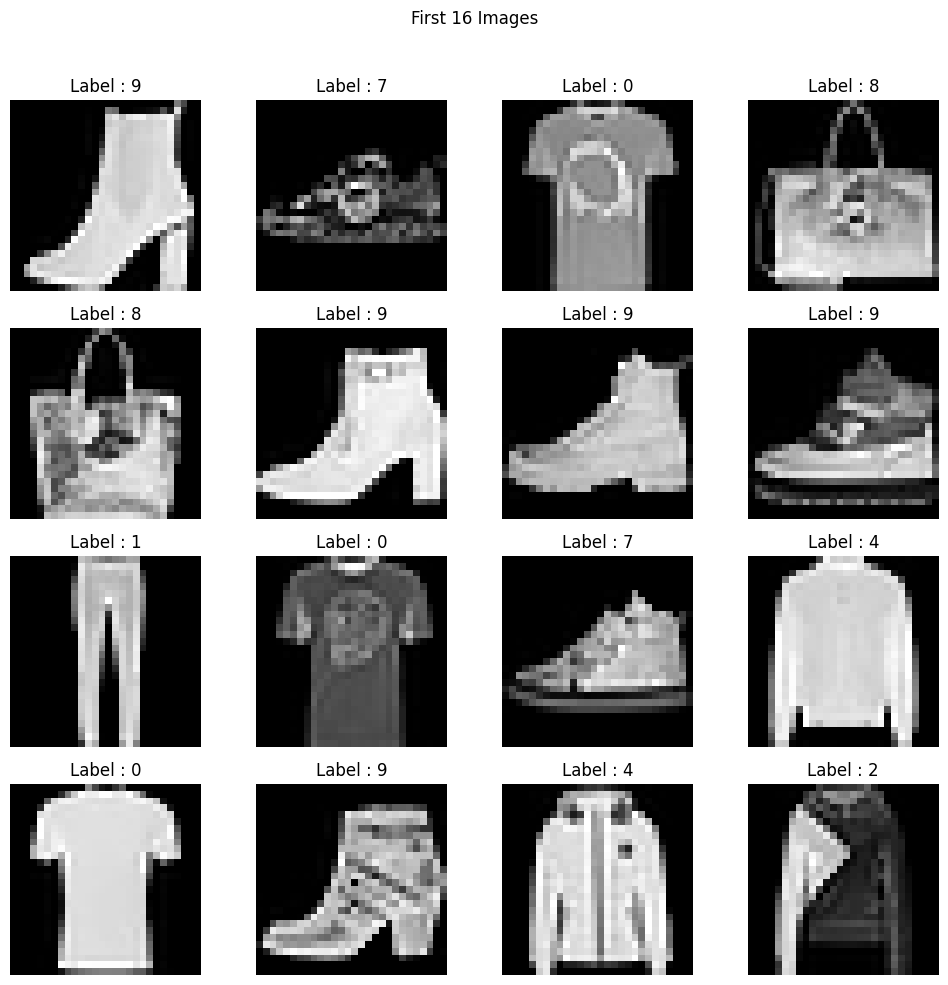

In [100]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))
fig.suptitle("First 16 Images")

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(f"Label : {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [101]:
x = df.drop("label", axis=1).values
y = df["label"].values

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [104]:
class CustomDataset(Dataset):
    
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [105]:
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [106]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [107]:
class NeuralNetwork(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax()
        )
    
    def forward(self, x):
        out = self.network(x)
        
        return out
        

In [108]:
model = NeuralNetwork(x_train.shape[1])

In [132]:
learning_rate = 0.1

In [133]:
epochs = 25

In [134]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [135]:
for epoch in range(epochs):
    
    total_epoch_loss = 0
    
    for batch_feature, batch_label in train_loader:
        
        # forward pass
        out = model(batch_feature)
        
        # loss function
        loss = criterion(out, batch_label)
        
        # back pass
        optimizer.zero_grad()
        loss.backward()
        
        # update grads
        optimizer.step()
        
        total_epoch_loss += loss.item()
    
    avg_loss = total_epoch_loss / len(train_loader)
    
    print(f"Epoch : {epoch+1} | Loss : {avg_loss}")

Epoch : 1 | Loss : 1.686589998404185
Epoch : 2 | Loss : 1.6864355238278708
Epoch : 3 | Loss : 1.6863932530085246
Epoch : 4 | Loss : 1.6864041519165038
Epoch : 5 | Loss : 1.6863382347424825
Epoch : 6 | Loss : 1.6863200640678406
Epoch : 7 | Loss : 1.6863090793291728
Epoch : 8 | Loss : 1.6862708648045859
Epoch : 9 | Loss : 1.686247344017029
Epoch : 10 | Loss : 1.686261457602183
Epoch : 11 | Loss : 1.6862279796600341
Epoch : 12 | Loss : 1.686231099764506
Epoch : 13 | Loss : 1.6867458589871724
Epoch : 14 | Loss : 1.6863601636886596
Epoch : 15 | Loss : 1.6859197012583416
Epoch : 16 | Loss : 1.6862842893600465
Epoch : 17 | Loss : 1.6857378840446473
Epoch : 18 | Loss : 1.685758686065674
Epoch : 19 | Loss : 1.6854387974739076
Epoch : 20 | Loss : 1.6853551284472148
Epoch : 21 | Loss : 1.6853147888183593
Epoch : 22 | Loss : 1.6854070234298706
Epoch : 23 | Loss : 1.68530392964681
Epoch : 24 | Loss : 1.685923039118449
Epoch : 25 | Loss : 1.671654011408488


In [136]:
model.eval()

NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)

In [137]:
total = 0
correct = 0

with torch.no_grad():
    for batch_feature, batch_label in test_loader: 
        out = model(batch_feature)
        
        _, predicted = torch.max(out, 1)
        
        total = total + batch_label.shape[0]
        
        correct += (predicted == batch_label).sum().item()
    
    print(correct / total)

0.7375
